In [5]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('font', family='Batang')
PATH = f"호출블록_2021년 1월-10월.csv"
df = pd.read_csv(PATH, parse_dates=['date_id'])
df

,date_id,블록이름,호출수
0,2021-01-03,학식,2
1,2021-01-04,도움말,11
2,2021-01-04,셔틀,3
3,2021-01-04,폴백 블록,3
4,2021-01-04,학식,55
...,...,...,...
1802,2021-10-29,학식운영시간,11
1803,2021-10-30,도움말,13
1804,2021-10-30,셔틀,2
1805,2021-10-30,학식,60


In [6]:
import datetime
def get_days(date): # 요일 구하는 함수
    date = list(map(int, date.split('-')))
    days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
    return days[datetime.date(date[0], date[1], date[2]).weekday()]

In [7]:
block = df.query("date_id.dt.dayofweek < 5")
block

,date_id,블록이름,호출수
1,2021-01-04,도움말,11
2,2021-01-04,셔틀,3
3,2021-01-04,폴백 블록,3
4,2021-01-04,학식,55
5,2021-01-05,도움말,29
...,...,...,...
1798,2021-10-29,웰컴 블록,2
1799,2021-10-29,지하철 도착 정보,2
1800,2021-10-29,폴백 블록,16
1801,2021-10-29,학식,287


In [8]:
block_holiday = block[(block['date_id'] == '2021-01-01') | (block['date_id'] == '2021-02-11') | (block['date_id'] == '2021-02-12') |
                      (block['date_id'] == '2021-03-01') | (block['date_id'] == '2021-05-05') | (block['date_id'] == '2021-05-19') |
                      (block['date_id'] == '2021-09-20') | (block['date_id'] == '2021-09-21') | (block['date_id'] == '2021-09-22') ].index
blocks = block.drop(block_holiday)
blocks

,date_id,블록이름,호출수
1,2021-01-04,도움말,11
2,2021-01-04,셔틀,3
3,2021-01-04,폴백 블록,3
4,2021-01-04,학식,55
5,2021-01-05,도움말,29
...,...,...,...
1798,2021-10-29,웰컴 블록,2
1799,2021-10-29,지하철 도착 정보,2
1800,2021-10-29,폴백 블록,16
1801,2021-10-29,학식,287


In [9]:
s = blocks.groupby(['블록이름']).sum()
block_sum = s.sort_values(by = '호출수',ascending = False)
block_sum

,호출수
블록이름,
학식,38982
도움말,10435
폴백 블록,2355
웰컴 블록,1240
셔틀,1129
날씨,491
식단 등록-중식,413
식단 등록-석식,385
날짜 입력,375


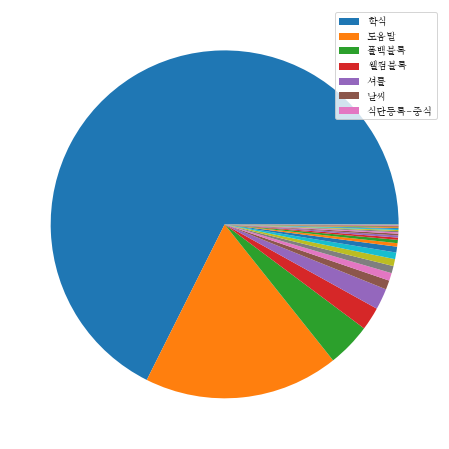

In [18]:
# 가장 많이 호출한 블록 확인
name = ['학식', '도움말', '폴백블록','웰컴블록','셔틀','날씨','식단등록-중식']
plt.figure(figsize=(22,8))
plt.pie(block_sum['호출수'])
plt.legend(name)